In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define matrix using 

N = 10

v1 = np.ones(N)-np.identity(N)[0,:]
v2 = -2*np.ones(N+1)+3*np.identity(N+1)[0,:]+3*np.identity(N+1)[-1,:]
v3 = np.ones(N)-np.identity(N)[-1,:]

In [3]:
# Function for the matrix vector multiplication

def vec_mat(v1, v2, v3, vector):
    """
    """
    result = np.zeros(len(vector))
    
    result[0] = v2[0] * vector[0] + v1[0] * vector[1]
    result[-1] = v2[-1] * vector[-1] + v3[-1] * vector[-2]
    
    result[1:-2] = np.dot(v3[:-1], vector[:-2]) + np.dot(v2[1:-1], vector[1:-1]) + np.dot(v1[1:],vector[2:])
        
    return result

In [4]:
def gauss_elimination(v1, v2, v3, inhomogeneity):
    
    diagonal = np.copy(v2)
    inhomo = np.copy(inhomogeneity)
    result = np.zeros(len(inhomogeneity))

    ## forward step of Gaussian elimination procedure:
    for i in range(1, len(inhomogeneity)):
        weight = v3[i-1]/diagonal[i-1]
        diagonal[i] -= weight*v1[i-1]
        inhomo[i] -= weight*inhomo[i-1]
    
    ## backward step of Gaussian elimination procedure:
    result[-1] = inhomo[-1]/diagonal[-1]
    for i in range(-2, -(len(inhomogeneity)+1), -1):
        result[i] = (inhomo[i]-v1[i+1]*result[i+1])/diagonal[i]
    return result

In [5]:
test = np.ones(N+1)
res = vec_mat(v1, v2, v3, test)

In [6]:
b = (-4*np.ones(N+1)+5*np.identity(N+1)[0,:]+5*np.identity(N+1)[-1,:])
b[1:-1] /= N**2
solution = gauss_elimination(v1, v2, v3, b)

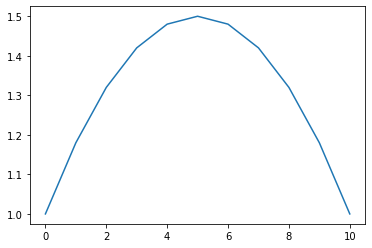

In [7]:
plt.plot(range(0, N+1), solution)

In [8]:
estimated_inhomo = vec_mat(v1, v2, v3, solution)
residuals = (estimated_inhomo-b)
print(np.dot(residuals, residuals))
variance = np.dot(residuals, residuals)/len(residuals)
print(variance)

0.8207999999999971
0.07461818181818156


In [9]:
## 1000
N = 1000

v1 = np.ones(N)-np.identity(N)[0,:]
v2 = -2*np.ones(N+1)+3*np.identity(N+1)[0,:]+3*np.identity(N+1)[-1,:]
v3 = np.ones(N)-np.identity(N)[-1,:]

In [10]:
test = np.ones(N+1)
res = vec_mat(v1, v2, v3, test)

In [11]:
b = (-4*np.ones(N+1)+5*np.identity(N+1)[0,:]+5*np.identity(N+1)[-1,:])
b[1:-1] /= N**2
solution_2 = gauss_elimination(v1, v2, v3, b)

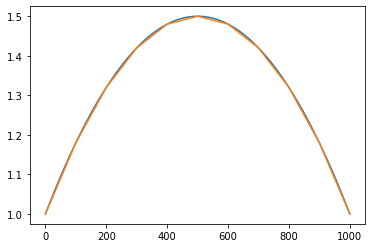

In [15]:
plt.plot(range(0, N+1), solution_2)
plt.plot(range(0, N+1, 100), solution)

In [ ]:
estimated_inhomo = vec_mat(v1, v2, v3, solution)
residuals = (estimated_inhomo-b)
print(np.dot(residuals, residuals))
variance = np.dot(residuals, residuals)/len(residuals)
print(variance)

## Jacobi

In [52]:
def jacobi(v1, v2, v3, inhomgeneity, seed):
    return v2**(-1)*inhomgeneity + v2**(-1)*(np.concatenate(([0], -v3*seed[:-1])) + np.concatenate((-v1*seed[1:], [0])))

In [53]:
N = 8

v1 = np.ones(N)-np.identity(N)[0,:]
v2 = -2*np.ones(N+1)+3*np.identity(N+1)[0,:]+3*np.identity(N+1)[-1,:]
v3 = np.ones(N)-np.identity(N)[-1,:]

b = (-4*np.ones(N+1)+5*np.identity(N+1)[0,:]+5*np.identity(N+1)[-1,:])
b[1:-1] /= N**2

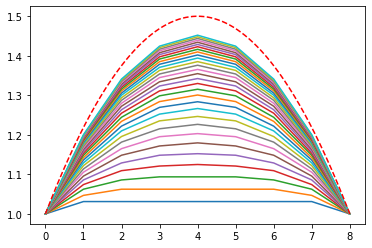

In [60]:
seed = np.ones(N+1)
for i in range(30):
    seed = jacobi(v1, v2, v3, b, seed)
    plt.plot(range(N+1), seed)
    
plt.plot(N/1000*np.linspace(0, 1000, num=1001), solution_2, 'r--')

In [71]:
N = 100

v1 = np.ones(N)-np.identity(N)[0,:]
v2 = -2*np.ones(N+1)+3*np.identity(N+1)[0,:]+3*np.identity(N+1)[-1,:]
v3 = np.ones(N)-np.identity(N)[-1,:]

b = (-4*np.ones(N+1)+5*np.identity(N+1)[0,:]+5*np.identity(N+1)[-1,:])
b[1:-1] /= N**2

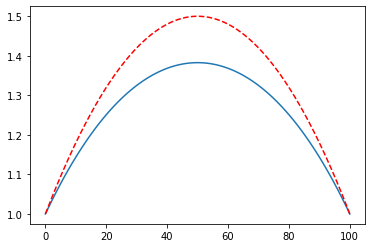

In [73]:
seed = np.ones(N+1)
for i in range(3000):
    seed = jacobi(v1, v2, v3, b, seed)
    
plt.plot(range(N+1), seed)    
plt.plot(N/1000*np.linspace(0, 1000, num=1001), solution_2, 'r--')

In [74]:
N = 100

v1 = np.ones(N)-np.identity(N)[0,:]
v2 = -2*np.ones(N+1)+3*np.identity(N+1)[0,:]+3*np.identity(N+1)[-1,:]
v3 = np.ones(N)-np.identity(N)[-1,:]

b = (-4*np.ones(N+1)+5*np.identity(N+1)[0,:]+5*np.identity(N+1)[-1,:])
b[1:-1] /= N**2

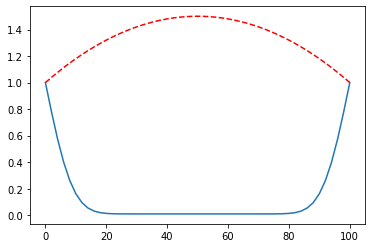

In [79]:
seed = np.zeros(N+1)
for i in range(50):
    seed = jacobi(v1, v2, v3, b, seed)
    
plt.plot(range(N+1), seed)    
plt.plot(N/1000*np.linspace(0, 1000, num=1001), solution_2, 'r--')